# OMEGA-MAPPIN 

This notebook shows some of the analyses of the FOOF results from the MEG Data. 

The analyses code is all in a custom module (om). Here, is just a demonstration of some results. 

All data used here is at the source level. Each subject data was ultimately project to a template anatomy with 7500 vertices. 

In [1]:
# Import required libraries/functions
from __future__ import print_function, division
import sys

# Import custom code from module om, including general functions and OO code for handling data
sys.path.append('/Users/thomasdonoghue/Documents/GitCode/omegamappin/')
from om.gen import *                    # Import general om code
from om.cl.md_sing import *             # Import Meg-Data code & classes for Single Subject
from om.plts.md_plts import *           # Import plots for Meg-Data

# Set plots to display inline
%matplotlib inline

In [2]:
# Set database object - choose which data to use
# The database object is a basic class that stores all paths for the project
db = OMDB('OMEGA')

In [3]:
# Check what data is available
sub_nums, source = db.check_dat_files('foof')


Number of Subjects available: 25

Subject numbers with FOOF data available: 
[111802, 124340, 195121, 215187, 218131, 220216, 245518, 265922, 320548, 339964, 369737, 386068, 390845, 403435, 405716, 431088, 504997, 548027, 559176, 604600, 704718, 704814, 719634, 756575, 978341]



### Single Subject Analysis

Here, loads a single subject and analyses the data. 

In [7]:
# Check what saved pickle files are available
#md_files = db.check_res_files('md')

In [4]:
## Import an individual subject of FOOF PSD results

# Set subject number to load
#subj = sub_nums[0]
subj = 559176

# Initialize data object and load data
meg_subj = MegData(db)
meg_subj.import_foof(subj, get_demo=True)

In [10]:
# OR: Load pickled object
#meg_subj = load_md_pickle(md_files[0])

In [11]:
# Use oscillatory bands to find oscillations per band per vertex
osc = Osc(default=True)                      # Osc is an object that stores parameters for oscillatory bands
meg_subj.osc_bands_vertex(osc)

# This data can now be exported to matlab to be plotted on the cortex with Brainstorm
#meg_subj.set_foof_viz()

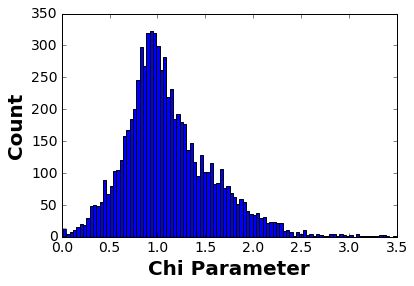

In [12]:
# Plot the distribution of slopes, as computed by FOOF
plot_slopes(meg_subj.slopes, meg_subj.title, save_out=False)

In [13]:
# Convert format to vectors of all oscillations (regardless of anatomical location)
meg_subj.all_oscs()

Subj: 559176 Found 191  NaNs. Removing.


Number of oscillations: 21803


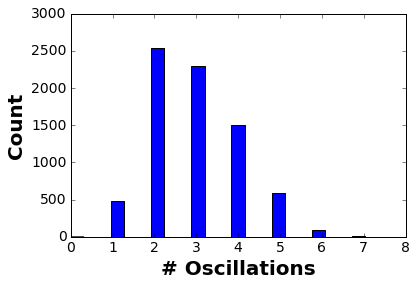

In [14]:
# Check how many oscillations were found total, and plot number of oscillations per vertex
print('Number of oscillations: ' + str(meg_subj.n_oscs))
plot_hist_count(meg_subj.osc_count)

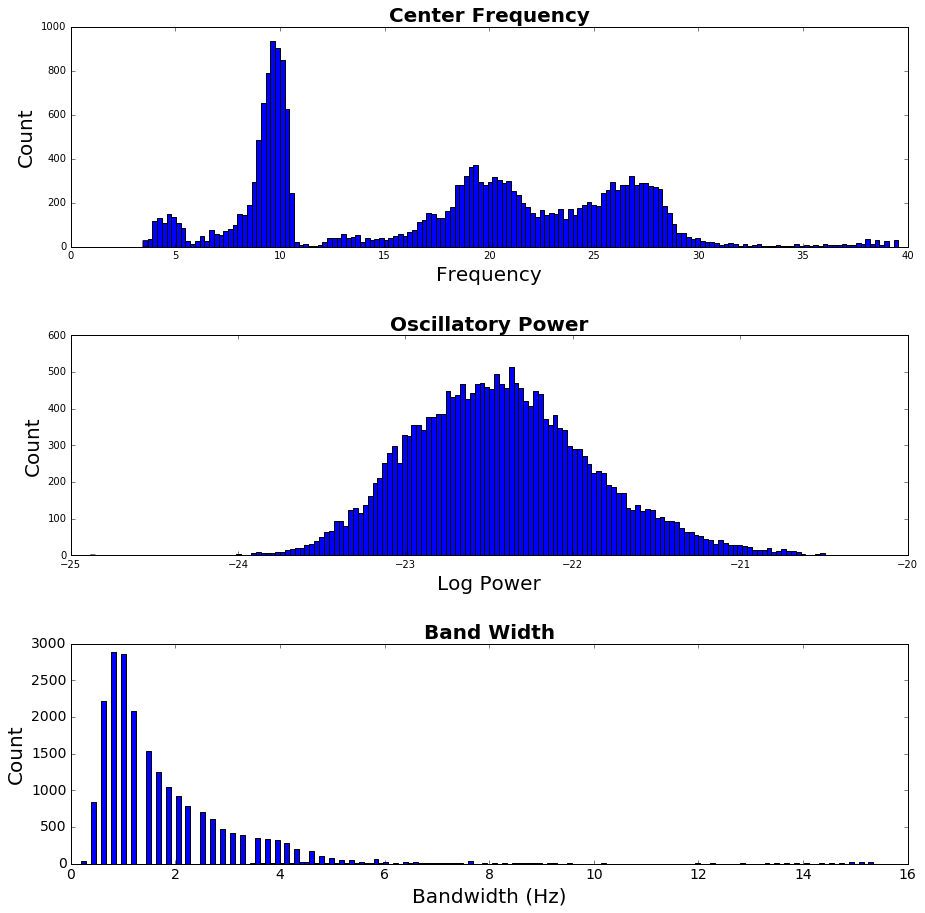

In [15]:
# Plot the distributions of centers, powers and bandwidths, across all oscillations
plot_all_oscs(meg_subj.centers_all, meg_subj.powers_all, meg_subj.bws_all, meg_subj.title)

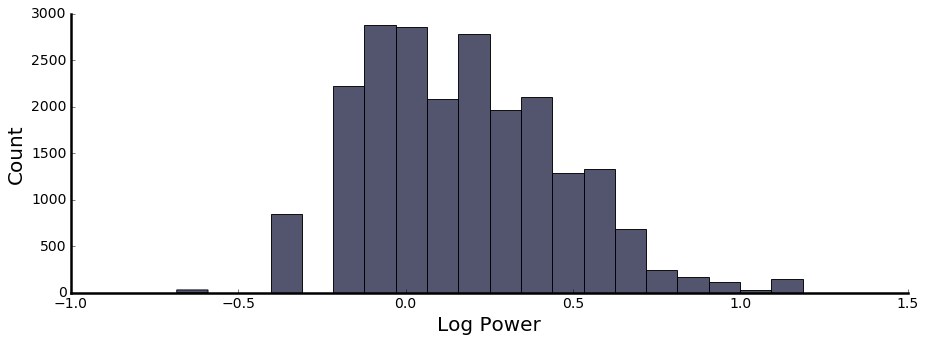

In [16]:
# Plot a single oscillation parameter at a time
plot_all_oscs_single(meg_subj.bws_all, 1, meg_subj.title, n_bins=20)

In [14]:
# Calculate correlations between oscillatory parameters
rs_mat, ps_mat, labels = meg_subj.calc_osc_param_corrs()
print_corrs_mat(rs_mat, ps_mat, labels)

Corr of  Centers-Powers      is  -0.3276     with p-val of  0.00000
Corr of  Centers-Bandwidths  is  +0.4651     with p-val of  0.00000
Corr of  Powers-Bandwidths   is  -0.2846     with p-val of  0.00000


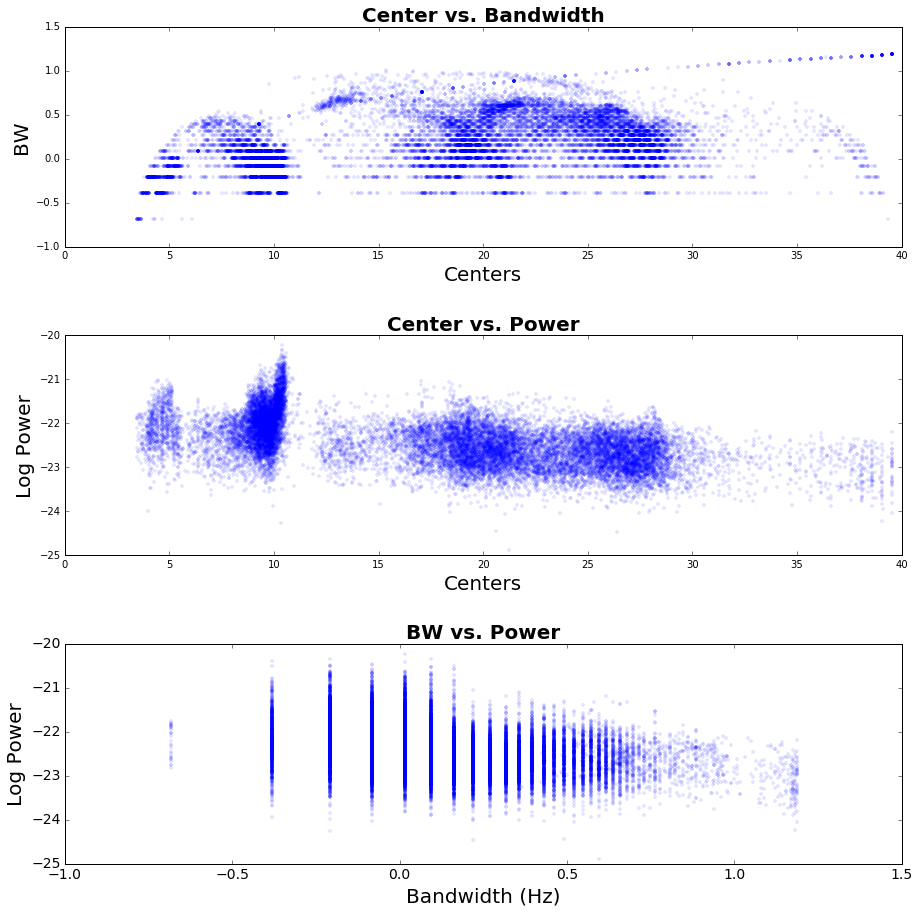

In [14]:
# Plot the comparisons between oscillatory parameters
plot_osc_param_comparison(meg_subj.centers_all, meg_subj.powers_all, meg_subj.bws_all, meg_subj.title)

In [15]:
# Save out meg_subj file
#save_md_pickle(meg_subj, 'test')